# Feature Engineering

Nessa etapa iremos fazer o tratamento dos outliers das variáveis numéricas e criar outras features utilizando o método de Weight of Evidence. Esse método será complementar ao processo de EDA e também nos possibilitará criar variáveis mais estáveis. Há uma possibilidade de perdermos performance com isso, porém ganhamos em estabilidade a longo prazo

In [1]:
# Importando as bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
from utils import *

FEATURES = ['VAR_1','VAR_6','VAR_9','VAR_19','VAR_57','VAR_72','VAR_20','VAR_25','VAR_28','VAR_32','VAR_40','VAR_60','VAR_64']

In [2]:
df = pd.read_csv('../../data/raw/base_modelo.csv')

## 1. Tratar os Outliers

In [3]:
# Vamos criar uma lista para iterar o tratamento dos outliers
selected_numeric_features = ['VAR_1', 'VAR_6', 'VAR_9', 'VAR_19', 'VAR_57', 'VAR_72']
selected_categorical_features = ['VAR_20', 'VAR_25', 'VAR_28', 'VAR_32', 'VAR_40', 'VAR_60', 'VAR_64']

In [4]:
for feat in selected_numeric_features:
    limit = np.percentile(df[df[feat].notna()][feat], 99.5)
    df.loc[df[feat].gt(limit), feat] = limit

## 2. Análise de Peso de Evidência

Esse será um processo muito analítico, porém é uma etapa muito importante que pode ajudar na feature selection. Como conseguimos diminuir bastante o número de variáveis a serem analisadas, esse método é perfeito para identificar as melhores features para o modelo. Será feito o seguinte método passo a passo
1. Montar uma tabela com as faixas/categorias para cada variável. Essa tabela irá conter a proporção da faixa/categoria, taxa de evento, WOE e IV daquela feature
2. Iremos agrupar as faixas/categorias de forma a montar uma tabela com WOE crescente ou decrescente
3. Variáveis com IV maiores que 2% serão selecionadas para o modelo
4. Para a análise de estabilidade iremos plotar um gráfico de frequência das novas faixas/categorias e a média do target por safra

### 2.1 Peso De Evidência - Features Numéricas

### 2.1.1 VAR_1

In [9]:
# Aqui iremos criar os intervalos iniciais da análise
bins = pd.qcut(df['VAR_1'], q=10, retbins=True, duplicates='drop')[1]

In [18]:
# Aplicando o Peso de Evidência nos bins. Vamos a partir dessas faixas, e com o conhecimento da EDA, propor intervalos novos
cuts = bins
grouped = pd.cut(df['VAR_1'], cuts)
woe = woe_table(grouped, df['y'])
woe.sort_index().style.format({
    "count": "{:,.0f}",
    "count_pct": "{:.0%}",
    "bads": "{:,.0f}",
    "goods": "{:,.0f}",
    "bads_pct": "{:.0%}",
    "goods_pct": "{:.0%}",
    "woe": "{:.0%}",
    "diff": "{:.0%}",
    "iv": "{:.1%}",
    "bad_rate": "{:.0%}",
    "bad_rate_norm_avg": "{:.0%}"
})

/Users/pedromaia/Documents/desafio-picpay/notebooks/feature_engineering/utils.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(grouped.name)[target.name].sum().rename("bads"),


,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
VAR_1,,,,,,,,,,,
"(0.0, 7.0]",764,11%,216,548,9%,12%,-30%,-3%,1.0%,28%,97%
"(7.0, 16.0]","1,198",17%,263,935,11%,21%,-64%,-10%,6.3%,22%,75%
"(16.0, 21.0]","1,124",16%,262,862,11%,19%,-56%,-8%,4.6%,23%,80%
"(21.0, 34.0]",892,13%,234,658,10%,15%,-41%,-5%,2.0%,26%,90%
"(34.0, 53.0]",911,13%,303,608,13%,13%,-7%,-1%,0.1%,33%,114%
"(53.0, 105.0]","1,033",15%,428,605,18%,13%,28%,4%,1.2%,41%,142%
"(105.0, 179.0]","1,024",15%,713,311,29%,7%,146%,23%,32.9%,70%,239%


In [39]:
cuts = [-np.inf, 0, 21, 53, 105, np.inf]
df['faixa_VAR_1'] = pd.cut(df['VAR_1'], cuts)
woe = woe_table(df['faixa_VAR_1'], df['y'])
woe.sort_index().style.format({
    "count": "{:,.0f}",
    "count_pct": "{:.0%}",
    "bads": "{:,.0f}",
    "goods": "{:,.0f}",
    "bads_pct": "{:.0%}",
    "goods_pct": "{:.0%}",
    "woe": "{:.0%}",
    "diff": "{:.0%}",
    "iv": "{:.1%}",
    "bad_rate": "{:.0%}",
    "bad_rate_norm_avg": "{:.0%}"
})

/Users/pedromaia/Documents/desafio-picpay/notebooks/feature_engineering/utils.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(grouped.name)[target.name].sum().rename("bads"),


,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
faixa_VAR_1,,,,,,,,,,,
"(-inf, 0.0]","3,376",33%,621,"2,755",20%,38%,-62%,-17%,10.7%,18%,63%
"(0.0, 21.0]","3,086",30%,741,"2,345",24%,32%,-28%,-8%,2.2%,24%,82%
"(21.0, 53.0]","1,803",17%,537,"1,266",18%,17%,2%,0%,0.0%,30%,102%
"(53.0, 105.0]","1,033",10%,428,605,14%,8%,53%,6%,3.0%,41%,142%
"(105.0, inf]","1,024",10%,713,311,23%,4%,170%,19%,32.7%,70%,239%


/var/folders/hx/97_2n4_s4tqdmzmdtp50ywg00000gp/T/ipykernel_9811/2360187658.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['safra', 'faixa_VAR_1']).y.mean().unstack().plot(


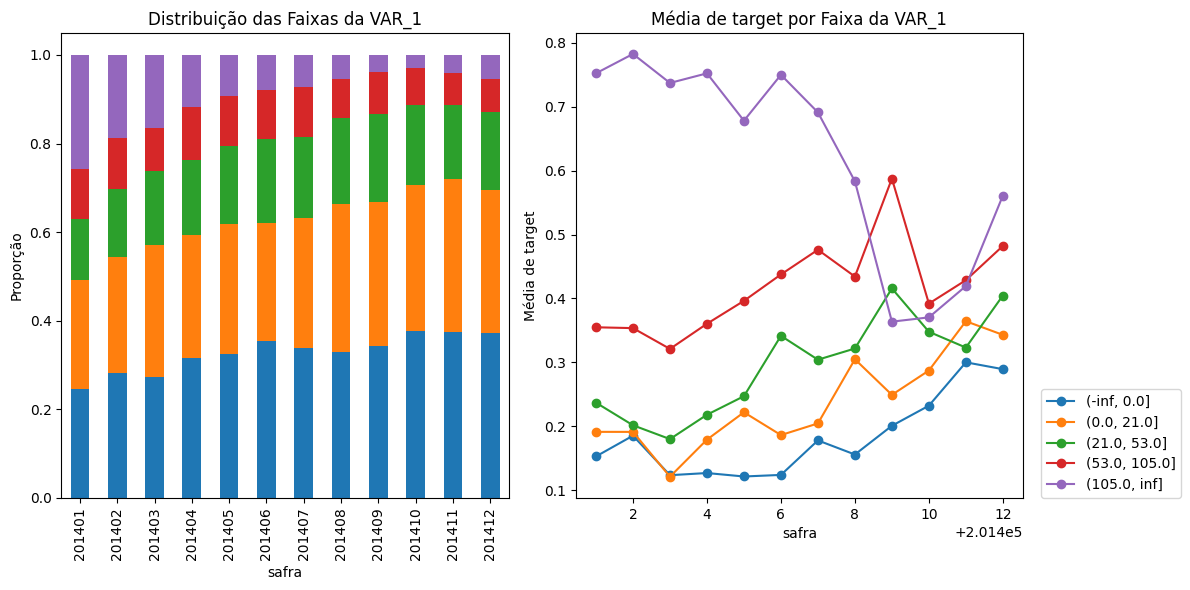

In [40]:
# Criando a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df.groupby('safra').faixa_VAR_1.value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[0], legend=False
)
axes[0].set_title('Distribuição das Faixas da VAR_1')
axes[0].set_ylabel('Proporção')

# Segundo gráfico: Gráfico de linha
df.groupby(['safra', 'faixa_VAR_1']).y.mean().unstack().plot(
    ax=axes[1], marker='o', linestyle='-'
)
plt.legend(loc=(1.04,0))
axes[1].set_title('Média de target por Faixa da VAR_1')
axes[1].set_ylabel('Média de target')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


### 2.1.2 VAR_6

In [27]:
# Aqui iremos criar os intervalos iniciais da análise
bins = pd.qcut(df['VAR_6'], q=10, retbins=True, duplicates='drop')[1]

In [28]:
# Aplicando o Peso de Evidência nos bins. Vamos a partir dessas faixas, e com o conhecimento da EDA, propor intervalos novos
cuts = bins
grouped = pd.cut(df['VAR_6'], cuts)
woe = woe_table(grouped, df['y'])
woe.sort_index().style.format({
    "count": "{:,.0f}",
    "count_pct": "{:.0%}",
    "bads": "{:,.0f}",
    "goods": "{:,.0f}",
    "bads_pct": "{:.0%}",
    "goods_pct": "{:.0%}",
    "woe": "{:.0%}",
    "diff": "{:.0%}",
    "iv": "{:.1%}",
    "bad_rate": "{:.0%}",
    "bad_rate_norm_avg": "{:.0%}"
})

/Users/pedromaia/Documents/desafio-picpay/notebooks/feature_engineering/utils.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(grouped.name)[target.name].sum().rename("bads"),


,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
VAR_6,,,,,,,,,,,
"(-94.0, 260.0]","1,068",10%,459,609,15%,8%,60%,7%,4.1%,43%,148%
"(260.0, 380.0]","1,067",10%,426,641,14%,9%,48%,5%,2.5%,40%,137%
"(380.0, 519.0]","1,059",10%,379,680,12%,9%,30%,3%,1.0%,36%,123%
"(519.0, 679.4]","1,064",10%,365,699,12%,9%,24%,2%,0.6%,34%,118%
"(679.4, 878.0]","1,065",10%,330,735,11%,10%,9%,1%,0.1%,31%,106%
"(878.0, 1166.0]","1,067",10%,295,772,10%,10%,-7%,-1%,0.1%,28%,95%
"(1166.0, 1645.0]","1,065",10%,239,826,8%,11%,-35%,-3%,1.1%,22%,77%
"(1645.0, 2440.8]","1,061",10%,215,846,7%,11%,-48%,-4%,2.1%,20%,70%
"(2440.8, 3285.2]","1,065",10%,198,867,6%,11%,-59%,-5%,3.0%,19%,64%


In [30]:
cuts = [-np.inf, 380.0, 679.4, 1166.0, np.inf]
df['faixa_VAR_6'] = pd.cut(df['VAR_6'], cuts)
woe = woe_table(df['faixa_VAR_6'], df['y'])
woe.sort_index().style.format({
    "count": "{:,.0f}",
    "count_pct": "{:.0%}",
    "bads": "{:,.0f}",
    "goods": "{:,.0f}",
    "bads_pct": "{:.0%}",
    "goods_pct": "{:.0%}",
    "woe": "{:.0%}",
    "diff": "{:.0%}",
    "iv": "{:.1%}",
    "bad_rate": "{:.0%}",
    "bad_rate_norm_avg": "{:.0%}"
})

/Users/pedromaia/Documents/desafio-picpay/notebooks/feature_engineering/utils.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(grouped.name)[target.name].sum().rename("bads"),


,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
faixa_VAR_6,,,,,,,,,,,
"(-inf, 380.0]","2,136",20%,885,"1,251",29%,17%,54%,12%,6.5%,41%,142%
"(380.0, 679.4]","2,123",20%,744,"1,379",24%,18%,27%,6%,1.5%,35%,120%
"(679.4, 1166.0]","2,132",20%,625,"1,507",20%,20%,1%,0%,0.0%,29%,101%
"(1166.0, inf]","4,256",40%,851,"3,405",27%,45%,-50%,-18%,8.9%,20%,69%


/var/folders/hx/97_2n4_s4tqdmzmdtp50ywg00000gp/T/ipykernel_9811/1763063570.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['safra', 'faixa_VAR_6']).y.mean().unstack().plot(


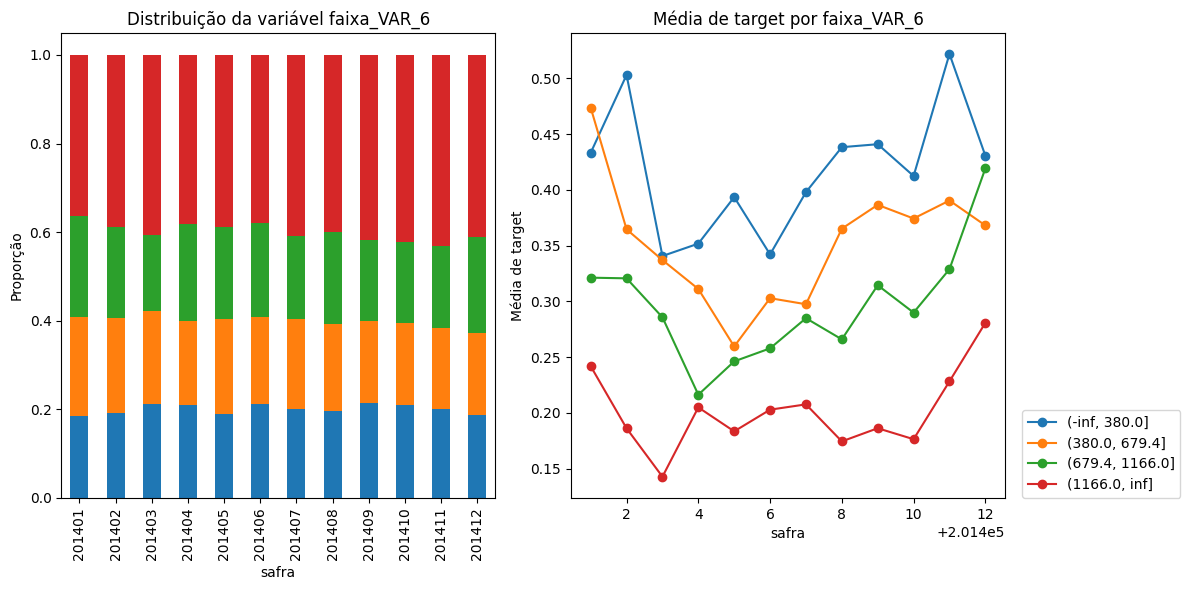

In [31]:
# Criando a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df.groupby('safra').faixa_VAR_6.value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[0], legend=False
)
axes[0].set_title('Distribuição da variável faixa_VAR_6')
axes[0].set_ylabel('Proporção')

# Segundo gráfico: Gráfico de linha
df.groupby(['safra', 'faixa_VAR_6']).y.mean().unstack().plot(
    ax=axes[1], marker='o', linestyle='-'
)
plt.legend(loc=(1.04,0))
axes[1].set_title('Média de target por faixa_VAR_6')
axes[1].set_ylabel('Média de target')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


### 2.1.3 VAR_9

In [33]:
# Aqui iremos criar os intervalos iniciais da análise
bins = pd.qcut(df['VAR_9'], q=10, retbins=True, duplicates='drop')[1]

In [34]:
# Aplicando o Peso de Evidência nos bins. Vamos a partir dessas faixas, e com o conhecimento da EDA, propor intervalos novos
cuts = bins
grouped = pd.cut(df['VAR_9'], cuts)
woe = woe_table(grouped, df['y'])
woe.sort_index().style.format({
    "count": "{:,.0f}",
    "count_pct": "{:.0%}",
    "bads": "{:,.0f}",
    "goods": "{:,.0f}",
    "bads_pct": "{:.0%}",
    "goods_pct": "{:.0%}",
    "woe": "{:.0%}",
    "diff": "{:.0%}",
    "iv": "{:.1%}",
    "bad_rate": "{:.0%}",
    "bad_rate_norm_avg": "{:.0%}"
})

/Users/pedromaia/Documents/desafio-picpay/notebooks/feature_engineering/utils.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(grouped.name)[target.name].sum().rename("bads"),


,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
VAR_9,,,,,,,,,,,
"(150.0, 424.901]","1,009",9%,163,846,5%,11%,-77%,-6%,4.6%,16%,55%
"(424.901, 570.0]","1,084",10%,243,841,8%,11%,-36%,-3%,1.2%,22%,77%
"(570.0, 786.739]","1,064",10%,292,772,9%,10%,-9%,-1%,0.1%,27%,94%
"(786.739, 1000.0]","3,174",30%,899,"2,275",29%,30%,-5%,-1%,0.1%,28%,97%
"(1000.0, 1040.0]",52,0%,20,32,1%,0%,41%,0%,0.1%,38%,132%
"(1040.0, 1444.033]","1,068",10%,374,694,12%,9%,26%,3%,0.7%,35%,120%
"(1444.033, 1651.692]","1,074",10%,360,714,12%,9%,20%,2%,0.4%,34%,115%
"(1651.692, 2000.0]","1,190",11%,422,768,13%,10%,28%,3%,0.9%,35%,122%
"(2000.0, 3000.0]",958,9%,353,605,11%,8%,34%,3%,1.1%,37%,126%


In [35]:
cuts = [-np.inf, 424.901, 570.0, 1000.0, np.inf]
df['faixa_VAR_9'] = pd.cut(df['VAR_9'], cuts)
woe = woe_table(df['faixa_VAR_9'], df['y'])
woe.sort_index().style.format({
    "count": "{:,.0f}",
    "count_pct": "{:.0%}",
    "bads": "{:,.0f}",
    "goods": "{:,.0f}",
    "bads_pct": "{:.0%}",
    "goods_pct": "{:.0%}",
    "woe": "{:.0%}",
    "diff": "{:.0%}",
    "iv": "{:.1%}",
    "bad_rate": "{:.0%}",
    "bad_rate_norm_avg": "{:.0%}"
})

/Users/pedromaia/Documents/desafio-picpay/notebooks/feature_engineering/utils.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(grouped.name)[target.name].sum().rename("bads"),


,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
faixa_VAR_9,,,,,,,,,,,
"(-inf, 424.901]","1,074",10%,165,909,5%,12%,-82%,-7%,5.5%,15%,53%
"(424.901, 570.0]","1,084",10%,243,841,8%,11%,-35%,-3%,1.2%,22%,77%
"(570.0, 1000.0]","4,238",39%,"1,191","3,047",38%,40%,-5%,-2%,0.1%,28%,96%
"(1000.0, inf]","4,342",40%,"1,529","2,813",49%,37%,28%,12%,3.3%,35%,121%


/var/folders/hx/97_2n4_s4tqdmzmdtp50ywg00000gp/T/ipykernel_9811/2763251381.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['safra', 'faixa_VAR_9']).y.mean().unstack().plot(


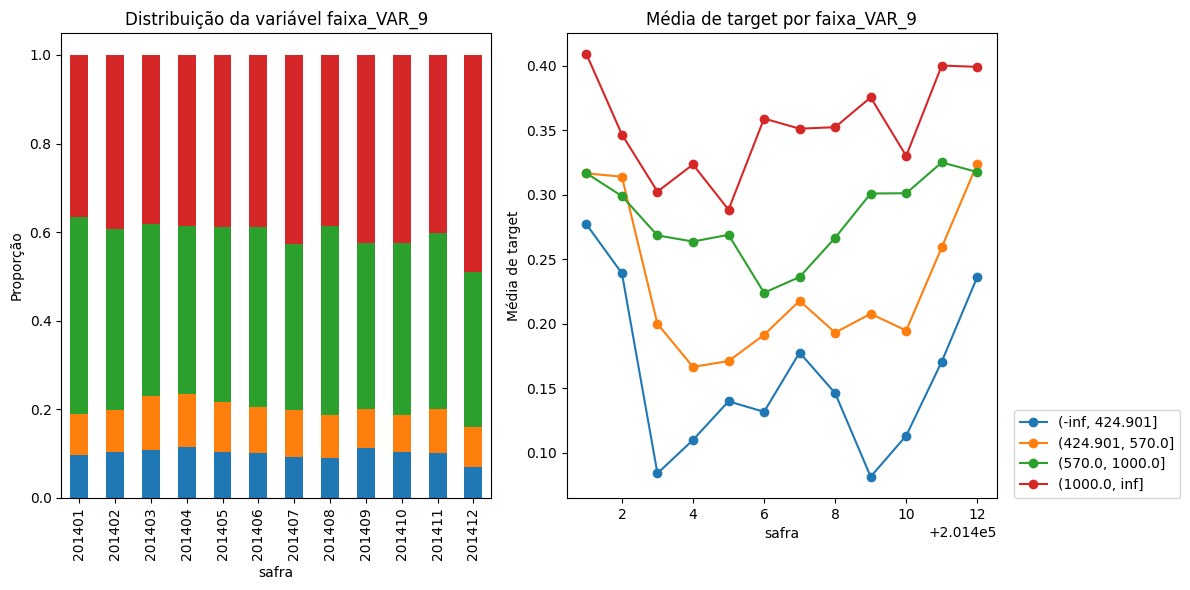

In [36]:
# Criando a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df.groupby('safra').faixa_VAR_9.value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[0], legend=False
)
axes[0].set_title('Distribuição da variável faixa_VAR_9')
axes[0].set_ylabel('Proporção')

# Segundo gráfico: Gráfico de linha
df.groupby(['safra', 'faixa_VAR_9']).y.mean().unstack().plot(
    ax=axes[1], marker='o', linestyle='-'
)
plt.legend(loc=(1.04,0))
axes[1].set_title('Média de target por faixa_VAR_9')
axes[1].set_ylabel('Média de target')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


### 2.1.4 VAR_19

In [42]:
# Aqui iremos criar os intervalos iniciais da análise
bins = pd.qcut(df['VAR_19'], q=10, retbins=True, duplicates='drop')[1]

In [43]:
# Aplicando o Peso de Evidência nos bins. Vamos a partir dessas faixas, e com o conhecimento da EDA, propor intervalos novos
cuts = bins
grouped = pd.cut(df['VAR_19'], cuts)
woe = woe_table(grouped, df['y'])
woe.sort_index().style.format({
    "count": "{:,.0f}",
    "count_pct": "{:.0%}",
    "bads": "{:,.0f}",
    "goods": "{:,.0f}",
    "bads_pct": "{:.0%}",
    "goods_pct": "{:.0%}",
    "woe": "{:.0%}",
    "diff": "{:.0%}",
    "iv": "{:.1%}",
    "bad_rate": "{:.0%}",
    "bad_rate_norm_avg": "{:.0%}"
})

/Users/pedromaia/Documents/desafio-picpay/notebooks/feature_engineering/utils.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(grouped.name)[target.name].sum().rename("bads"),


,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
VAR_19,,,,,,,,,,,
"(0.0, 3.0]",323,9%,61,262,9%,9%,-2%,-0%,0.0%,19%,65%
"(3.0, 13.0]","1,083",31%,259,824,39%,29%,28%,9%,2.7%,24%,82%
"(13.0, 30.0]","1,057",30%,202,855,30%,30%,-0%,-0%,0.0%,19%,66%
"(30.0, 86.0]","1,026",29%,147,879,22%,31%,-35%,-9%,3.2%,14%,49%


In [48]:
cuts = [-np.inf, 0, 13, np.inf]
df['faixa_VAR_19'] = pd.cut(df['VAR_19'], cuts)
woe = woe_table(df['faixa_VAR_19'], df['y'])
woe.sort_index().style.format({
    "count": "{:,.0f}",
    "count_pct": "{:.0%}",
    "bads": "{:,.0f}",
    "goods": "{:,.0f}",
    "bads_pct": "{:.0%}",
    "goods_pct": "{:.0%}",
    "woe": "{:.0%}",
    "diff": "{:.0%}",
    "iv": "{:.1%}",
    "bad_rate": "{:.0%}",
    "bad_rate_norm_avg": "{:.0%}"
})

/Users/pedromaia/Documents/desafio-picpay/notebooks/feature_engineering/utils.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(grouped.name)[target.name].sum().rename("bads"),


,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
faixa_VAR_19,,,,,,,,,,,
"(-inf, 0.0]","7,188",67%,"2,443","4,745",79%,63%,22%,16%,3.5%,34%,117%
"(0.0, 13.0]","1,406",13%,320,"1,086",10%,14%,-33%,-4%,1.4%,23%,78%
"(13.0, inf]","2,083",20%,349,"1,734",11%,23%,-71%,-12%,8.4%,17%,58%


/var/folders/hx/97_2n4_s4tqdmzmdtp50ywg00000gp/T/ipykernel_9811/4026255018.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['safra', 'faixa_VAR_19']).y.mean().unstack().plot(


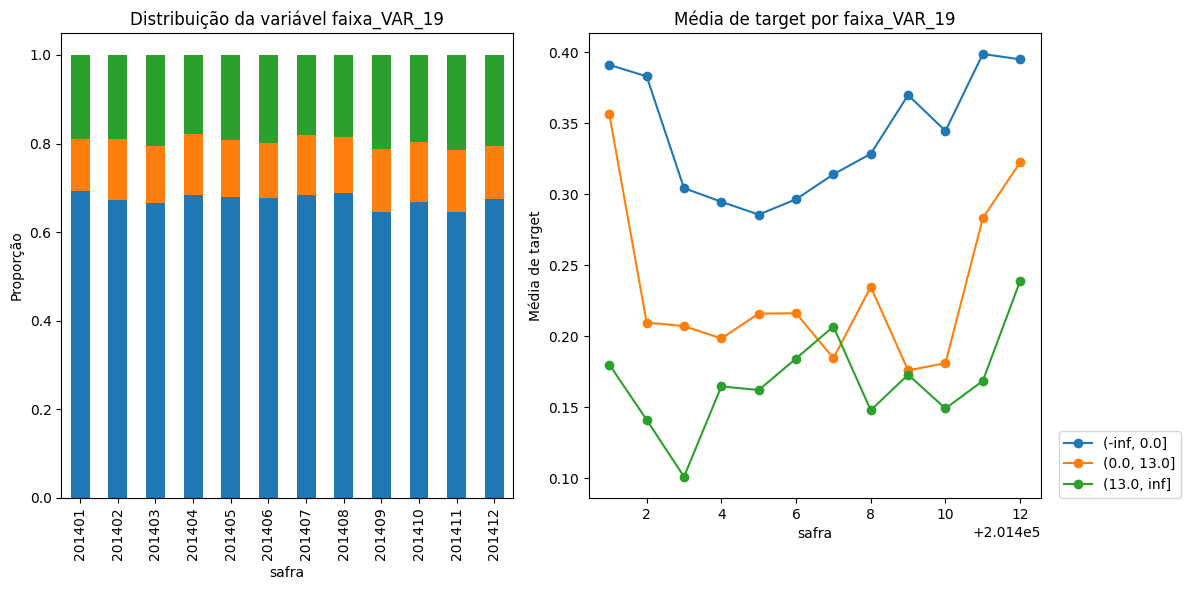

In [49]:
# Criando a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df.groupby('safra').faixa_VAR_19.value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[0], legend=False
)
axes[0].set_title('Distribuição da variável faixa_VAR_19')
axes[0].set_ylabel('Proporção')

# Segundo gráfico: Gráfico de linha
df.groupby(['safra', 'faixa_VAR_19']).y.mean().unstack().plot(
    ax=axes[1], marker='o', linestyle='-'
)
plt.legend(loc=(1.04,0))
axes[1].set_title('Média de target por faixa_VAR_19')
axes[1].set_ylabel('Média de target')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


### 2.1.5 VAR_57

In [51]:
# Aqui iremos criar os intervalos iniciais da análise
bins = pd.qcut(df['VAR_57'], q=10, retbins=True, duplicates='drop')[1]

In [52]:
# Aplicando o Peso de Evidência nos bins. Vamos a partir dessas faixas, e com o conhecimento da EDA, propor intervalos novos
cuts = bins
grouped = pd.cut(df['VAR_57'], cuts)
woe = woe_table(grouped, df['y'])
woe.sort_index().style.format({
    "count": "{:,.0f}",
    "count_pct": "{:.0%}",
    "bads": "{:,.0f}",
    "goods": "{:,.0f}",
    "bads_pct": "{:.0%}",
    "goods_pct": "{:.0%}",
    "woe": "{:.0%}",
    "diff": "{:.0%}",
    "iv": "{:.1%}",
    "bad_rate": "{:.0%}",
    "bad_rate_norm_avg": "{:.0%}"
})

/Users/pedromaia/Documents/desafio-picpay/notebooks/feature_engineering/utils.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(grouped.name)[target.name].sum().rename("bads"),


,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
VAR_57,,,,,,,,,,,
"(18.0, 29.0]","1,178",11%,452,726,14%,10%,42%,5%,2.1%,38%,132%
"(29.0, 34.0]","1,059",10%,378,681,12%,9%,30%,3%,1.0%,36%,123%
"(34.0, 38.0]","1,041",10%,376,665,12%,9%,32%,3%,1.1%,36%,124%
"(38.0, 42.0]","1,103",10%,344,759,11%,10%,10%,1%,0.1%,31%,107%
"(42.0, 46.0]","1,156",11%,353,803,11%,11%,7%,1%,0.1%,31%,105%
"(46.0, 49.0]",921,9%,254,667,8%,9%,-7%,-1%,0.0%,28%,95%
"(49.0, 53.0]","1,126",10%,279,847,9%,11%,-22%,-2%,0.5%,25%,85%
"(53.0, 57.0]","1,035",10%,239,796,8%,10%,-31%,-3%,0.9%,23%,79%
"(57.0, 64.0]","1,155",11%,262,893,8%,12%,-34%,-3%,1.1%,23%,78%


In [58]:
cuts = [-np.inf, 38.0, 49.0, 64.0, np.inf]
df['faixa_VAR_57'] = pd.cut(df['VAR_57'], cuts)
woe = woe_table(df['faixa_VAR_57'], df['y'])
woe.sort_index().style.format({
    "count": "{:,.0f}",
    "count_pct": "{:.0%}",
    "bads": "{:,.0f}",
    "goods": "{:,.0f}",
    "bads_pct": "{:.0%}",
    "goods_pct": "{:.0%}",
    "woe": "{:.0%}",
    "diff": "{:.0%}",
    "iv": "{:.1%}",
    "bad_rate": "{:.0%}",
    "bad_rate_norm_avg": "{:.0%}"
})

/Users/pedromaia/Documents/desafio-picpay/notebooks/feature_engineering/utils.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(grouped.name)[target.name].sum().rename("bads"),


,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
faixa_VAR_57,,,,,,,,,,,
"(-inf, 38.0]","3,289",31%,"1,214","2,075",39%,27%,35%,12%,4.1%,37%,127%
"(38.0, 49.0]","3,180",30%,951,"2,229",30%,29%,4%,1%,0.0%,30%,103%
"(49.0, 64.0]","3,316",31%,780,"2,536",25%,33%,-29%,-8%,2.4%,24%,81%
"(64.0, inf]",953,9%,183,770,6%,10%,-55%,-4%,2.3%,19%,66%


/var/folders/hx/97_2n4_s4tqdmzmdtp50ywg00000gp/T/ipykernel_9811/1494653587.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['safra', 'faixa_VAR_57']).y.mean().unstack().plot(


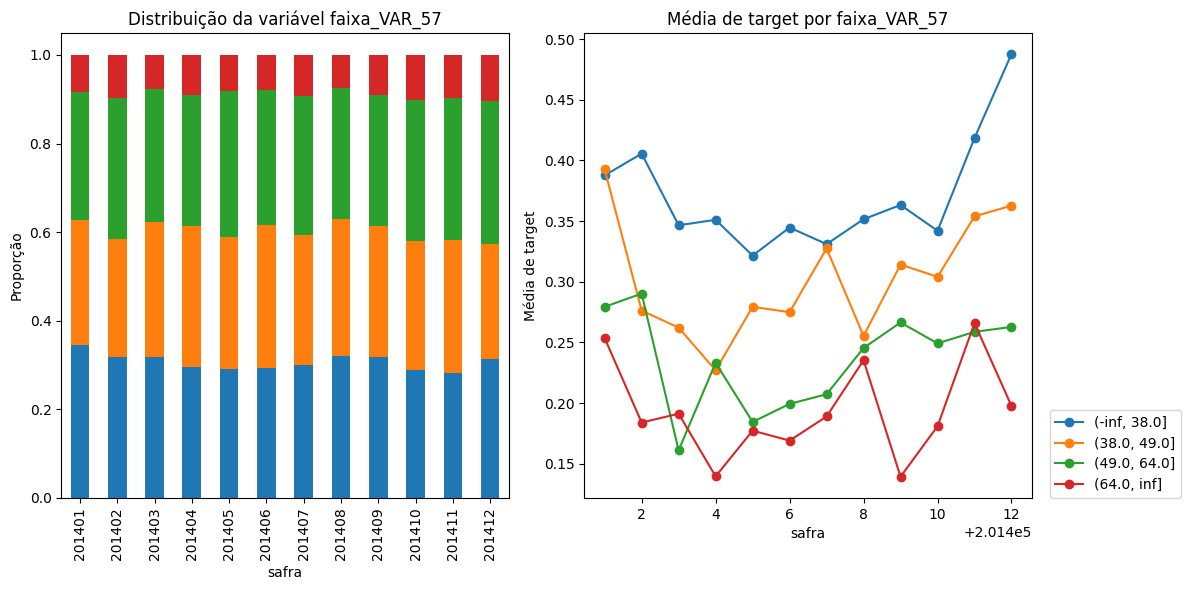

In [59]:
# Criando a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df.groupby('safra').faixa_VAR_57.value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[0], legend=False
)
axes[0].set_title('Distribuição da variável faixa_VAR_57')
axes[0].set_ylabel('Proporção')

# Segundo gráfico: Gráfico de linha
df.groupby(['safra', 'faixa_VAR_57']).y.mean().unstack().plot(
    ax=axes[1], marker='o', linestyle='-'
)
plt.legend(loc=(1.04,0))
axes[1].set_title('Média de target por faixa_VAR_57')
axes[1].set_ylabel('Média de target')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


### 2.1.6 VAR_72

In [5]:
# Aqui iremos criar os intervalos iniciais da análise
bins = pd.qcut(df['VAR_72'], q=10, retbins=True, duplicates='drop')[1]

In [6]:
# Aplicando o Peso de Evidência nos bins. Vamos a partir dessas faixas, e com o conhecimento da EDA, propor intervalos novos
cuts = bins
grouped = pd.cut(df['VAR_72'], cuts)
woe = woe_table(grouped, df['y'])
woe.sort_index().style.format({
    "count": "{:,.0f}",
    "count_pct": "{:.0%}",
    "bads": "{:,.0f}",
    "goods": "{:,.0f}",
    "bads_pct": "{:.0%}",
    "goods_pct": "{:.0%}",
    "woe": "{:.0%}",
    "diff": "{:.0%}",
    "iv": "{:.1%}",
    "bad_rate": "{:.0%}",
    "bad_rate_norm_avg": "{:.0%}"
})

/Users/pedromaia/Documents/desafio-picpay/notebooks/feature_engineering/utils.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(grouped.name)[target.name].sum().rename("bads"),


,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
VAR_72,,,,,,,,,,,
"(-104.0, -34.4]","1,064",10%,359,705,12%,9%,21%,2%,0.5%,34%,116%
"(-34.4, 3.0]","1,131",11%,377,754,12%,10%,19%,2%,0.4%,33%,114%
"(3.0, 15.0]","1,008",9%,312,696,10%,9%,8%,1%,0.1%,31%,106%
"(15.0, 32.0]","1,115",10%,344,771,11%,10%,8%,1%,0.1%,31%,106%
"(32.0, 55.0]","1,033",10%,301,732,10%,10%,-0%,-0%,0.0%,29%,100%
"(55.0, 88.0]","1,060",10%,298,762,10%,10%,-5%,-1%,0.0%,28%,97%
"(88.0, 145.0]","1,049",10%,290,759,9%,10%,-7%,-1%,0.1%,28%,95%
"(145.0, 243.0]","1,061",10%,301,760,10%,10%,-4%,-0%,0.0%,28%,97%
"(243.0, 472.0]","1,061",10%,284,777,9%,10%,-12%,-1%,0.1%,27%,92%


In [8]:
cuts = [-np.inf, 3, 32.0, np.inf]
df['faixa_VAR_72'] = pd.cut(df['VAR_72'], cuts)
woe = woe_table(df['faixa_VAR_72'], df['y'])
woe.sort_index().style.format({
    "count": "{:,.0f}",
    "count_pct": "{:.0%}",
    "bads": "{:,.0f}",
    "goods": "{:,.0f}",
    "bads_pct": "{:.0%}",
    "goods_pct": "{:.0%}",
    "woe": "{:.0%}",
    "diff": "{:.0%}",
    "iv": "{:.1%}",
    "bad_rate": "{:.0%}",
    "bad_rate_norm_avg": "{:.0%}"
})

/Users/pedromaia/Documents/desafio-picpay/notebooks/feature_engineering/utils.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(grouped.name)[target.name].sum().rename("bads"),


,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
faixa_VAR_72,,,,,,,,,,,
"(-inf, 3.0]","2,196",21%,736,"1,460",24%,19%,20%,4%,0.9%,34%,115%
"(3.0, 32.0]","2,123",20%,656,"1,467",21%,19%,8%,2%,0.1%,31%,106%
"(32.0, inf]","6,328",59%,"1,713","4,615",55%,61%,-10%,-6%,0.6%,27%,93%


/var/folders/hx/97_2n4_s4tqdmzmdtp50ywg00000gp/T/ipykernel_3178/1142225720.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['safra', 'faixa_VAR_72']).y.mean().unstack().plot(


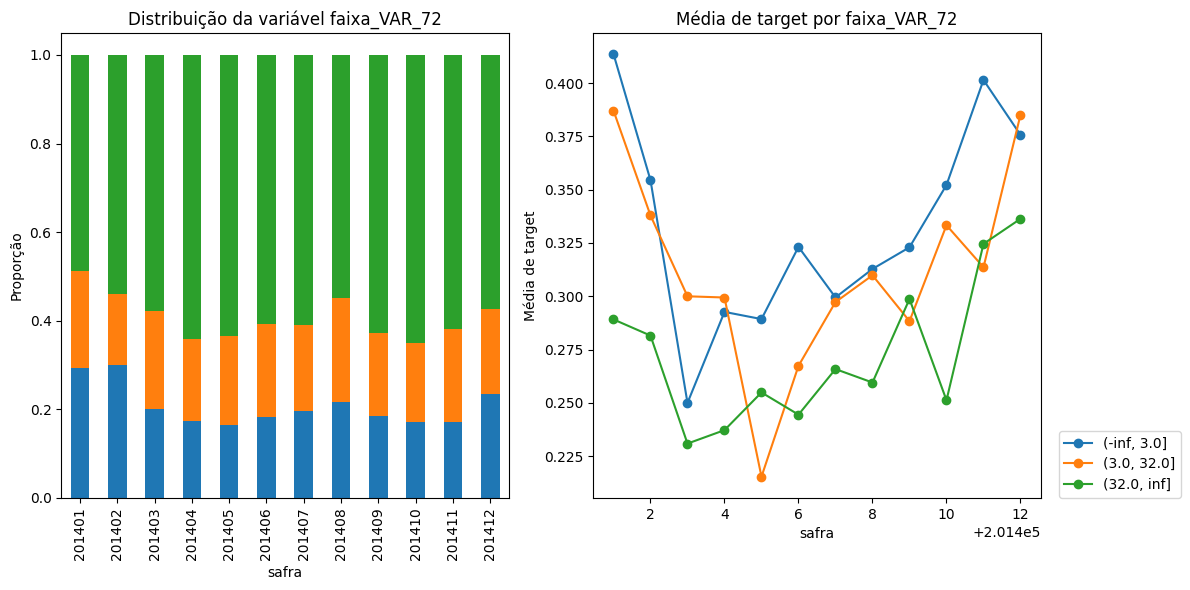

In [9]:
# Criando a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df.groupby('safra').faixa_VAR_72.value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[0], legend=False
)
axes[0].set_title('Distribuição da variável faixa_VAR_72')
axes[0].set_ylabel('Proporção')

# Segundo gráfico: Gráfico de linha
df.groupby(['safra', 'faixa_VAR_72']).y.mean().unstack().plot(
    ax=axes[1], marker='o', linestyle='-'
)
plt.legend(loc=(1.04,0))
axes[1].set_title('Média de target por faixa_VAR_72')
axes[1].set_ylabel('Média de target')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


### 2.2 Features Categóricas

### 2.2.1 VAR_20

In [68]:
woe_table_cat(df, 'y', 'VAR_20')

,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
group,,,,,,,,,,,
3,405,3.77%,27,378,1%,5%,-175%,-4%,7.2%,6.67%,23%
4,255,2.37%,30,225,1%,3%,-113%,-2%,2.2%,11.76%,40%
7,133,1.24%,16,117,1%,2%,-110%,-1%,1.1%,12.03%,41%
5,424,3.95%,75,349,2%,5%,-65%,-2%,1.4%,17.69%,61%
6,638,5.94%,118,520,4%,7%,-59%,-3%,1.8%,18.50%,63%
8,415,3.86%,86,329,3%,4%,-45%,-2%,0.7%,20.72%,71%
9,91,0.85%,22,69,1%,1%,-25%,-0%,0.1%,24.18%,83%
10,858,7.99%,222,636,7%,8%,-16%,-1%,0.2%,25.87%,89%
11,12,0.11%,4,8,0%,0%,20%,0%,0.0%,33.33%,114%


In [86]:
df['VAR_20_agrupado'] = df.VAR_20.astype(str)
dict_groups = {
               4: ['3', '4', '7'],
               3: ['5', '6', '8'],
               2: ['9', '10'],
               1: ['11', '12'],
              }

for chave, valor in dict_groups.items():
    df.loc[df['VAR_20_agrupado'].isin(valor), 'VAR_20_agrupado'] = chave

woe_table_cat(df, 'y', 'VAR_20_agrupado')

,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
group,,,,,,,,,,,
4,793,7.38%,73,720,2%,9%,-140%,-7%,10.0%,9.21%,32%
3,"1,477",13.75%,279,"1,198",9%,16%,-57%,-7%,3.9%,18.89%,65%
2,949,8.84%,244,705,8%,9%,-17%,-1%,0.3%,25.71%,88%
1,"7,519",70.02%,"2,532","4,987",81%,66%,21%,15%,3.3%,33.67%,116%


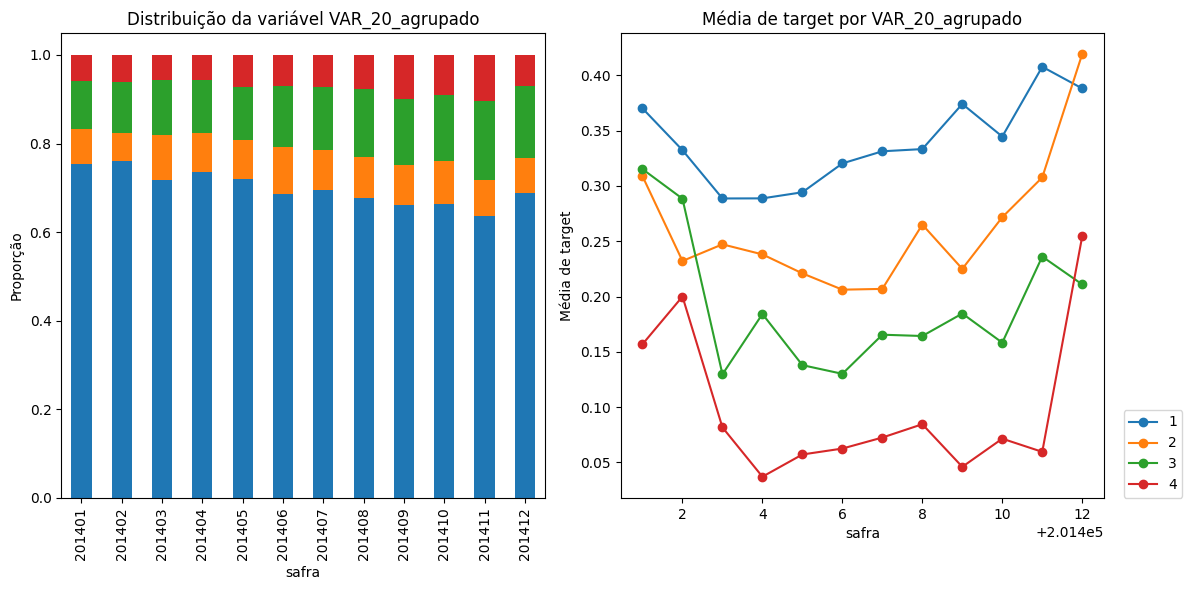

In [87]:
# Criando a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df.groupby('safra').VAR_20_agrupado.value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[0], legend=False
)
axes[0].set_title('Distribuição da variável VAR_20_agrupado')
axes[0].set_ylabel('Proporção')

# Segundo gráfico: Gráfico de linha
df.groupby(['safra', 'VAR_20_agrupado']).y.mean().unstack().plot(
    ax=axes[1], marker='o', linestyle='-'
)
plt.legend(loc=(1.04,0))
axes[1].set_title('Média de target por VAR_20_agrupado')
axes[1].set_ylabel('Média de target')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


### 2.2.1 VAR_25

In [89]:
woe_table_cat(df, 'y', 'VAR_25')

,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
group,,,,,,,,,,,
11.000000,340,3.17%,51,289,2%,4%,-85%,-2%,1.8%,15.00%,51%
12.000000,426,3.97%,70,356,2%,5%,-74%,-2%,1.8%,16.43%,56%
10.000000,321,2.99%,54,267,2%,4%,-71%,-2%,1.3%,16.82%,58%
7.000000,281,2.62%,51,230,2%,3%,-62%,-1%,0.9%,18.15%,62%
8.000000,303,2.82%,57,246,2%,3%,-57%,-1%,0.8%,18.81%,65%
5.000000,274,2.55%,53,221,2%,3%,-54%,-1%,0.7%,19.34%,66%
9.000000,310,2.89%,61,249,2%,3%,-52%,-1%,0.7%,19.68%,68%
3.000000,255,2.37%,52,203,2%,3%,-47%,-1%,0.5%,20.39%,70%
6.000000,287,2.67%,61,226,2%,3%,-42%,-1%,0.4%,21.25%,73%


In [100]:
df['VAR_25_agrupado'] = df.VAR_25.astype(str)
dict_groups = {
               2: ['11.0', '12.0', '10.0', '7.0', '8.0', '5.0', '9.0', '3.0', '6.0', '4.0'],
               1: ['1.0', '2.0', '0.0'],
              }

for chave, valor in dict_groups.items():
    df.loc[df['VAR_25_agrupado'].isin(valor), 'VAR_25_agrupado'] = chave
    
woe_table_cat(df[df.VAR_25_agrupado.ne('nan')], 'y', 'VAR_25_agrupado')

,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
group,,,,,,,,,,,
2,"3,049",28.56%,564,"2,485",18%,33%,-59%,-15%,8.8%,18.50%,63%
1,"7,628",71.44%,"2,548","5,080",82%,67%,20%,15%,2.9%,33.40%,115%


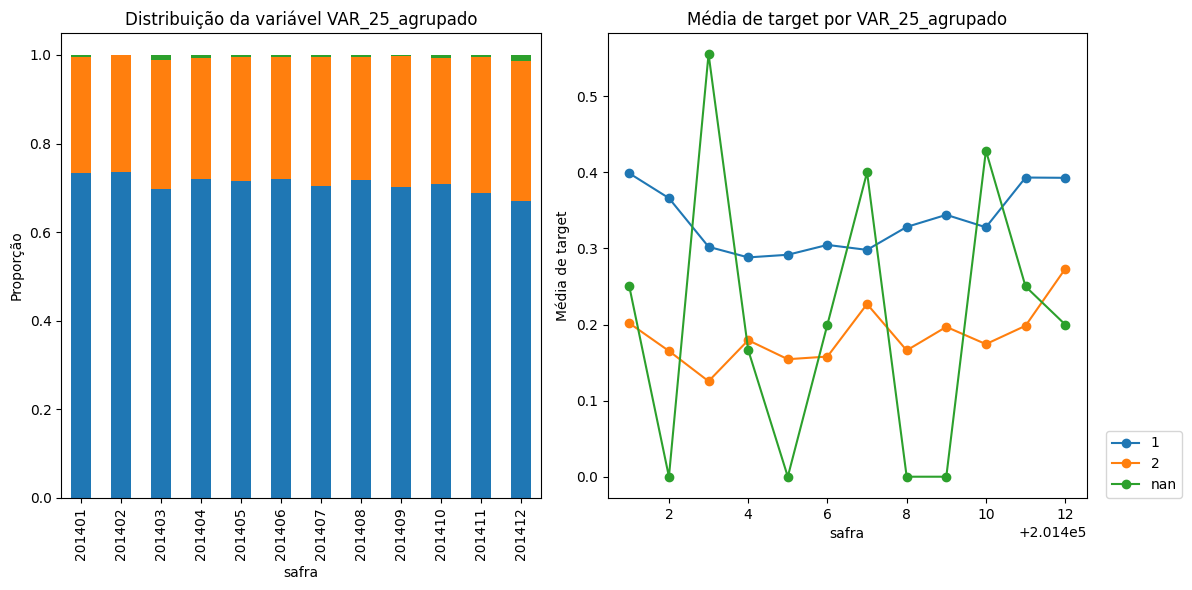

In [101]:
# Criando a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df.groupby('safra').VAR_25_agrupado.value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[0], legend=False
)
axes[0].set_title('Distribuição da variável VAR_25_agrupado')
axes[0].set_ylabel('Proporção')

# Segundo gráfico: Gráfico de linha
df.groupby(['safra', 'VAR_25_agrupado']).y.mean().unstack().plot(
    ax=axes[1], marker='o', linestyle='-'
)
plt.legend(loc=(1.04,0))
axes[1].set_title('Média de target por VAR_25_agrupado')
axes[1].set_ylabel('Média de target')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


### 2.2.3 VAR_28

In [103]:
woe_table_cat(df, 'y', 'VAR_28')

,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
group,,,,,,,,,,,
12.000000,"1,105",10.29%,189,916,6%,12%,-69%,-6%,4.1%,17.10%,59%
11.000000,485,4.52%,85,400,3%,5%,-66%,-3%,1.7%,17.53%,60%
9.000000,229,2.13%,43,186,1%,2%,-58%,-1%,0.6%,18.78%,64%
4.000000,187,1.74%,37,150,1%,2%,-51%,-1%,0.4%,19.79%,68%
10.000000,282,2.63%,56,226,2%,3%,-51%,-1%,0.6%,19.86%,68%
6.000000,201,1.87%,40,161,1%,2%,-50%,-1%,0.4%,19.90%,68%
5.000000,203,1.89%,41,162,1%,2%,-48%,-1%,0.4%,20.20%,69%
2.000000,176,1.64%,37,139,1%,2%,-43%,-1%,0.3%,21.02%,72%
7.000000,235,2.19%,50,185,2%,2%,-42%,-1%,0.3%,21.28%,73%


In [105]:
df['VAR_28_agrupado'] = df.VAR_28.astype(str)
dict_groups = {
               2: ['12.0', '11.0', '9.0', '4.0', '10.0', '6.0', '5.0', '2.0', '7.0', '3.0'],
               1: ['1.0', '8.0', '0.0'],
              }

for chave, valor in dict_groups.items():
    df.loc[df['VAR_28_agrupado'].isin(valor), 'VAR_28_agrupado'] = chave
    
woe_table_cat(df[df.VAR_28_agrupado.ne('nan')], 'y', 'VAR_28_agrupado')

,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
group,,,,,,,,,,,
2,"3,292",30.83%,621,"2,671",20%,35%,-57%,-15%,8.8%,18.86%,65%
1,"7,385",69.17%,"2,491","4,894",80%,65%,21%,15%,3.3%,33.73%,116%


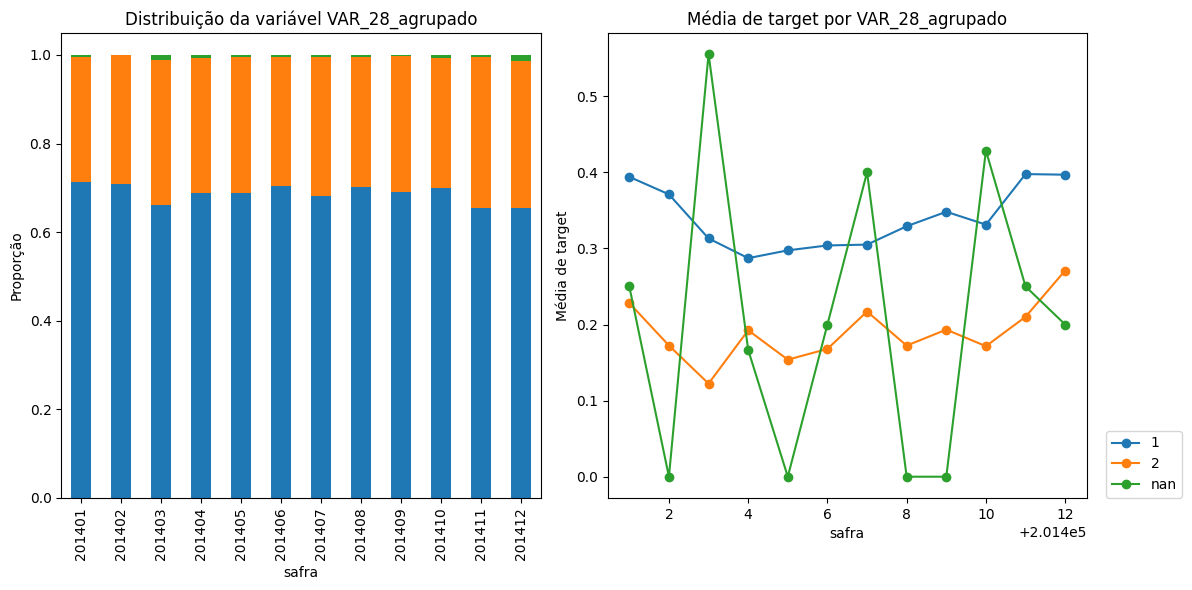

In [106]:
# Criando a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df.groupby('safra').VAR_28_agrupado.value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[0], legend=False
)
axes[0].set_title('Distribuição da variável VAR_28_agrupado')
axes[0].set_ylabel('Proporção')

# Segundo gráfico: Gráfico de linha
df.groupby(['safra', 'VAR_28_agrupado']).y.mean().unstack().plot(
    ax=axes[1], marker='o', linestyle='-'
)
plt.legend(loc=(1.04,0))
axes[1].set_title('Média de target por VAR_28_agrupado')
axes[1].set_ylabel('Média de target')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


### 2.2.4 VAR_32

In [115]:
df['VAR_32'] = df['VAR_32'].round(4)
woe_table_cat(df, 'y', 'VAR_32')

,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
group,,,,,,,,,,,
0.133800,"7,127",66.37%,"1,709","5,418",55%,71%,-26%,-17%,4.4%,23.98%,82%
-0.151000,3,0.03%,1,2,0%,0%,20%,0%,0.0%,33.33%,114%
0.046700,89,0.83%,33,56,1%,1%,36%,0%,0.1%,37.08%,127%
0.090600,"2,502",23.30%,944,"1,558",30%,20%,39%,10%,3.8%,37.73%,130%
0.057200,993,9.25%,428,565,14%,7%,61%,6%,3.8%,43.10%,148%
-0.103400,4,0.04%,2,2,0%,0%,89%,0%,0.0%,50.00%,172%
-0.038600,4,0.04%,2,2,0%,0%,89%,0%,0.0%,50.00%,172%
0.020000,15,0.14%,8,7,0%,0%,102%,0%,0.2%,53.33%,183%
-0.011600,1,0.01%,1,0,0%,0%,inf%,0%,inf%,100.00%,343%


### Observação

Com a WoE é possível notar que a VAR_32 possui um comportamento que pode fazê-la se encaixar como uma variável contínua, sendo assim daremos prosseguimento a sua análise de WoE semelhante ao WoE das features numéricas

In [12]:
cuts = [-np.inf, 0.08, 0.13, np.inf]
df['faixa_VAR_32'] = pd.cut(df['VAR_32'], cuts)
woe = woe_table(df['faixa_VAR_32'], df['y'])
woe.sort_index().style.format({
    "count": "{:,.0f}",
    "count_pct": "{:.0%}",
    "bads": "{:,.0f}",
    "goods": "{:,.0f}",
    "bads_pct": "{:.0%}",
    "goods_pct": "{:.0%}",
    "woe": "{:.0%}",
    "diff": "{:.0%}",
    "iv": "{:.1%}",
    "bad_rate": "{:.0%}",
    "bad_rate_norm_avg": "{:.0%}"
})

/Users/pedromaia/Documents/desafio-picpay/notebooks/feature_engineering/utils.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(grouped.name)[target.name].sum().rename("bads"),


,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
faixa_VAR_32,,,,,,,,,,,
"(-inf, 0.08]","1,109",10%,475,634,15%,8%,60%,7%,4.1%,43%,147%
"(0.08, 0.13]","2,502",23%,944,"1,558",30%,20%,39%,10%,3.8%,38%,130%
"(0.13, inf]","7,127",66%,"1,709","5,418",55%,71%,-26%,-17%,4.4%,24%,82%


/var/folders/hx/97_2n4_s4tqdmzmdtp50ywg00000gp/T/ipykernel_3178/782184966.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['safra', 'faixa_VAR_32']).y.mean().unstack().plot(


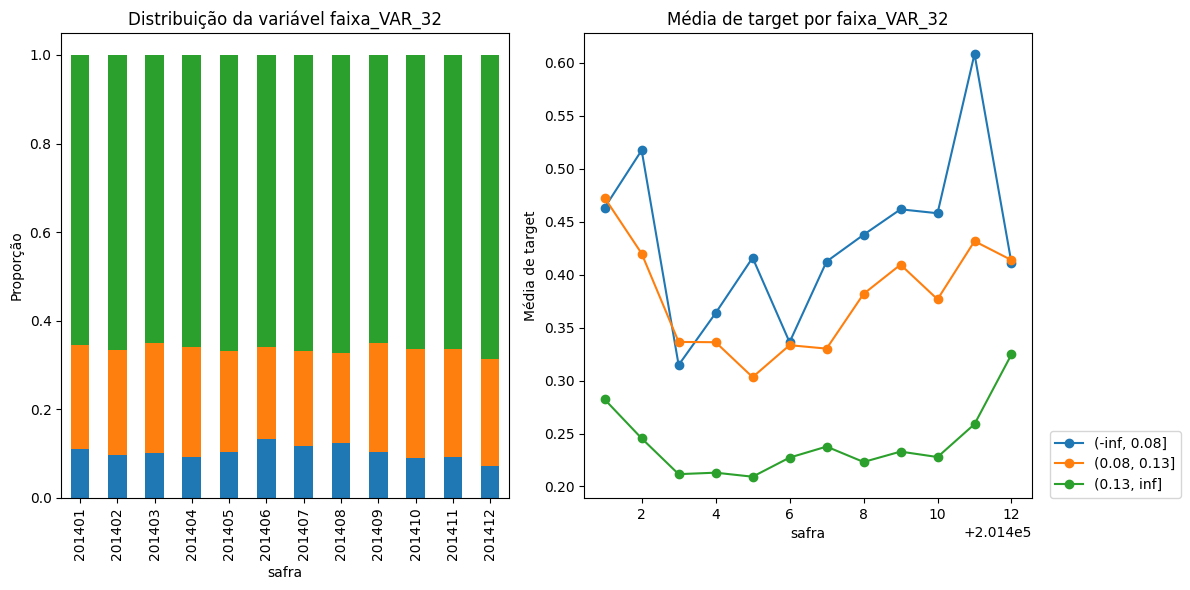

In [13]:
# Criando a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df.groupby('safra').faixa_VAR_32.value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[0], legend=False
)
axes[0].set_title('Distribuição da variável faixa_VAR_32')
axes[0].set_ylabel('Proporção')

# Segundo gráfico: Gráfico de linha
df.groupby(['safra', 'faixa_VAR_32']).y.mean().unstack().plot(
    ax=axes[1], marker='o', linestyle='-'
)
plt.legend(loc=(1.04,0))
axes[1].set_title('Média de target por faixa_VAR_32')
axes[1].set_ylabel('Média de target')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


### 2.2.5 VAR_40

In [14]:
woe_table_cat(df, 'y', 'VAR_40')

,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
group,,,,,,,,,,,
12.000000,531,4.95%,86,445,3%,6%,-75%,-3%,2.3%,16.20%,56%
11.000000,467,4.35%,85,382,3%,5%,-61%,-2%,1.4%,18.20%,62%
9.000000,434,4.04%,83,351,3%,5%,-55%,-2%,1.1%,19.12%,66%
6.000000,450,4.19%,98,352,3%,5%,-39%,-1%,0.6%,21.78%,75%
10.000000,437,4.07%,99,338,3%,4%,-34%,-1%,0.4%,22.65%,78%
4.000000,375,3.49%,85,290,3%,4%,-34%,-1%,0.4%,22.67%,78%
8.000000,455,4.24%,105,350,3%,5%,-31%,-1%,0.4%,23.08%,79%
5.000000,402,3.74%,96,306,3%,4%,-27%,-1%,0.3%,23.88%,82%
7.000000,409,3.81%,99,310,3%,4%,-25%,-1%,0.2%,24.21%,83%


In [21]:
# No caso da VAR_40 vamos tentar criar faixas, semelhantes ao WoE das features contínuas
# Iremos fazer isso para aumentar a interpretabilidade do modelo

df['VAR_40_agrupado'] = df.VAR_40.astype(str)
dict_groups = {
               3: ['12.0', '11.0', '9.0', '10.0'],
               2: ['4.0', '6.0', '5.0', '7.0', '4.0',  '8.0','3.0', '2.0', '1.0'],
               1: ['0.0'],
              }

for chave, valor in dict_groups.items():
    df.loc[df['VAR_40_agrupado'].isin(valor), 'VAR_40_agrupado'] = chave
    
woe_table_cat(df[df.VAR_40_agrupado.ne('nan')], 'y', 'VAR_40_agrupado')

,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
group,,,,,,,,,,,
3,"1,869",17.50%,353,"1,516",11%,20%,-57%,-9%,4.9%,18.89%,65%
2,"3,201",29.98%,792,"2,409",25%,32%,-22%,-6%,1.4%,24.74%,85%
1,"5,607",52.51%,"1,967","3,640",63%,48%,27%,15%,4.1%,35.08%,120%


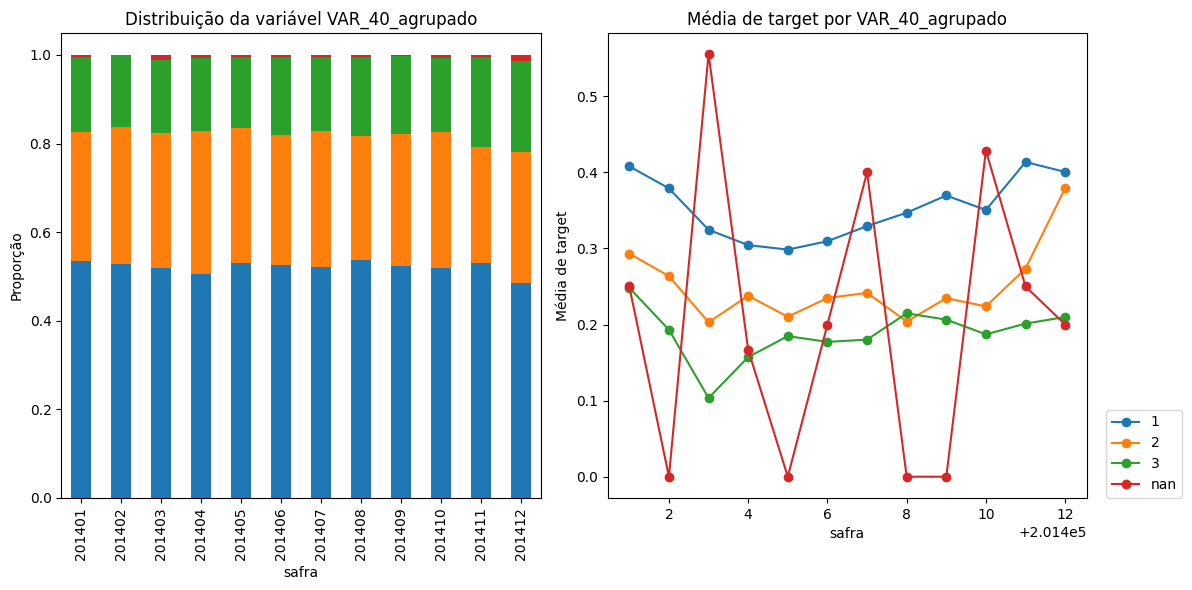

In [22]:
# Criando a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df.groupby('safra').VAR_40_agrupado.value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[0], legend=False
)
axes[0].set_title('Distribuição da variável VAR_40_agrupado')
axes[0].set_ylabel('Proporção')

# Segundo gráfico: Gráfico de linha
df.groupby(['safra', 'VAR_40_agrupado']).y.mean().unstack().plot(
    ax=axes[1], marker='o', linestyle='-'
)
plt.legend(loc=(1.04,0))
axes[1].set_title('Média de target por VAR_40_agrupado')
axes[1].set_ylabel('Média de target')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


### 2.2.6 VAR_60

In [126]:
df['VAR_60'] = df['VAR_60'].round(4)
woe_table_cat(df, 'y', 'VAR_60')

,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
group,,,,,,,,,,,
0.648200,244,2.27%,38,206,1%,3%,-80%,-1%,1.2%,15.57%,53%
0.721600,468,4.36%,86,382,3%,5%,-60%,-2%,1.4%,18.38%,63%
0.412300,150,1.40%,29,121,1%,2%,-54%,-1%,0.4%,19.33%,66%
0.534900,366,3.41%,79,287,3%,4%,-40%,-1%,0.5%,21.58%,74%
0.219400,832,7.75%,185,647,6%,9%,-36%,-3%,0.9%,22.24%,76%
0.319400,213,1.98%,48,165,2%,2%,-35%,-1%,0.2%,22.54%,77%
0.242900,244,2.27%,57,187,2%,2%,-30%,-1%,0.2%,23.36%,80%
0.357300,880,8.20%,213,667,7%,9%,-25%,-2%,0.5%,24.20%,83%
0.156300,872,8.12%,228,644,7%,8%,-15%,-1%,0.2%,26.15%,90%


### Observação

Com a WoE é possível notar que a VAR_60 possui um comportamento que pode fazê-la se encaixar como uma variável contínua, sendo assim daremos prosseguimento a sua análise de WoE semelhante ao WoE das features numéricas

In [135]:
cuts = [-np.inf, -0.35, 0, 0.4, np.inf]
df['faixa_VAR_60'] = pd.cut(df['VAR_60'], cuts)
woe = woe_table(df['faixa_VAR_60'], df['y'])
woe.sort_index().style.format({
    "count": "{:,.0f}",
    "count_pct": "{:.0%}",
    "bads": "{:,.0f}",
    "goods": "{:,.0f}",
    "bads_pct": "{:.0%}",
    "goods_pct": "{:.0%}",
    "woe": "{:.0%}",
    "diff": "{:.0%}",
    "iv": "{:.1%}",
    "bad_rate": "{:.0%}",
    "bad_rate_norm_avg": "{:.0%}"
})

/Users/pedromaia/Documents/desafio-picpay/notebooks/feature_engineering/utils.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(grouped.name)[target.name].sum().rename("bads"),


,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
faixa_VAR_60,,,,,,,,,,,
"(-inf, -0.35]","2,020",19%,761,"1,259",24%,17%,39%,8%,3.0%,38%,129%
"(-0.35, 0.0]","3,528",33%,"1,150","2,378",37%,31%,16%,6%,0.9%,33%,112%
"(0.0, 0.4]","3,962",37%,985,"2,977",31%,39%,-22%,-8%,1.7%,25%,85%
"(0.4, inf]","1,228",11%,232,996,7%,13%,-57%,-6%,3.2%,19%,65%


/var/folders/hx/97_2n4_s4tqdmzmdtp50ywg00000gp/T/ipykernel_9811/1397418592.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['safra', 'faixa_VAR_60']).y.mean().unstack().plot(


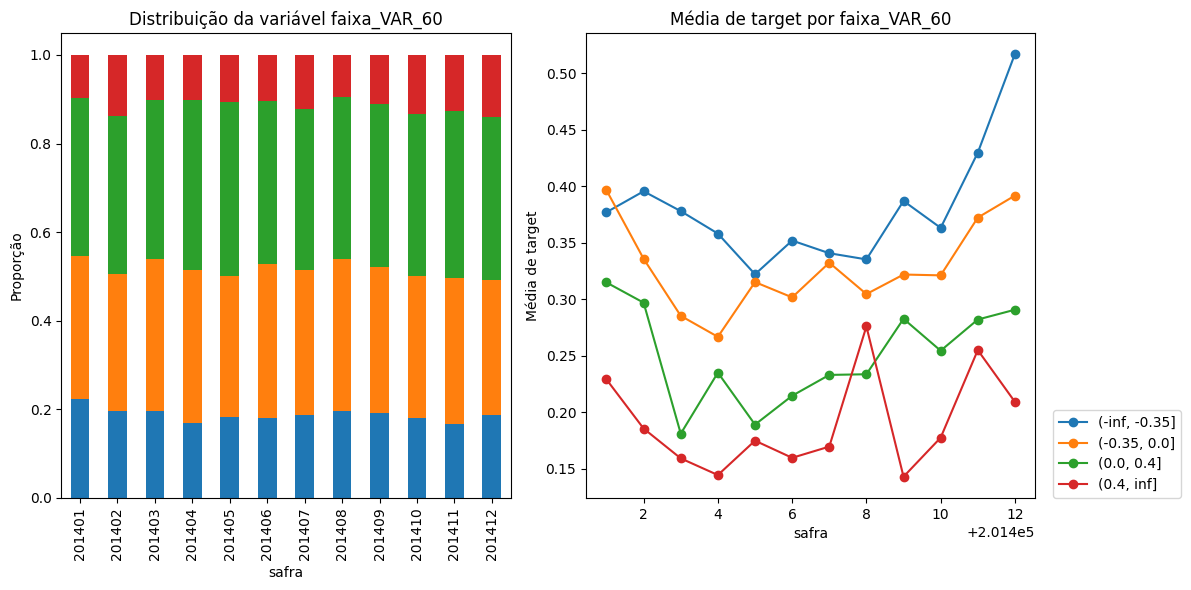

In [136]:
# Criando a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df.groupby('safra').faixa_VAR_60.value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[0], legend=False
)
axes[0].set_title('Distribuição da variável faixa_VAR_60')
axes[0].set_ylabel('Proporção')

# Segundo gráfico: Gráfico de linha
df.groupby(['safra', 'faixa_VAR_60']).y.mean().unstack().plot(
    ax=axes[1], marker='o', linestyle='-'
)
plt.legend(loc=(1.04,0))
axes[1].set_title('Média de target por faixa_VAR_60')
axes[1].set_ylabel('Média de target')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


### 2.2.7 VAR_64

In [138]:
woe_table_cat(df, 'y', 'VAR_64')

,count,count_pct,bads,goods,bads_pct,goods_pct,woe,diff,iv,bad_rate,bad_rate_norm_avg
group,,,,,,,,,,,
0,"4,219",39.29%,900,"3,319",29%,44%,-42%,-15%,6.2%,21.33%,73%
1,"6,519",60.71%,"2,228","4,291",71%,56%,23%,15%,3.5%,34.18%,117%


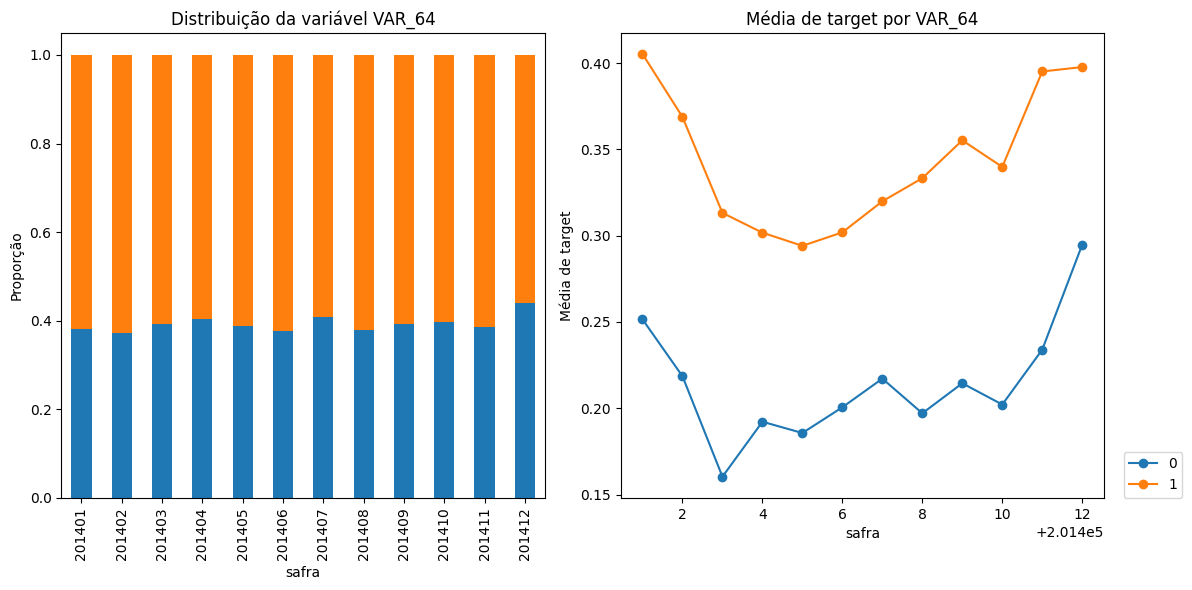

In [139]:
# Criando a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df.groupby('safra').VAR_64.value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[0], legend=False
)
axes[0].set_title('Distribuição da variável VAR_64')
axes[0].set_ylabel('Proporção')

# Segundo gráfico: Gráfico de linha
df.groupby(['safra', 'VAR_64']).y.mean().unstack().plot(
    ax=axes[1], marker='o', linestyle='-'
)
plt.legend(loc=(1.04,0))
axes[1].set_title('Média de target por VAR_64')
axes[1].set_ylabel('Média de target')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


## Conclusão
* Com as variáveis selecionadas na etapa de EDA conseguimos identificar diversas features que são candidatas a serem forte preditoras. Salvo a exceção da VAR_1, que se demonstrou ser uma booa feature, mas não é muito estável ao longo do tempo. Essa feature pode até aumentar a performance no treinamento, porém isso não nos trará estabilidade ao longo do tempo;
* Das variáveis discretas muito correlacionadas que observamos na EDA vamos escolher a VAR_28 versus a VAR_25. Ambas tem comportamento muito semelhante, porém com a VAR_25 conseguimos montar duas faixas com risco separados e em ordem crescente. Ex: podemos separar a faixa de 0 a 2 em um grupo e maior que 2 em outro grupo. Isso irá facilitar no Feature Engineering e na interpretabilidade do modelo;
* Apesar de poder trazer ganhos, para utilizar a VAR_64 teríamos que nos livrar de pelo menos de outras 3 features. Por conta disso optaremos por não utilizar a VAR_64 no treinamento;
* O agrupamento de faixas/categorias pelo método de WoE conseguiu gerar grupos com boa relevância para o target selecionado, nos ajudando a melhor selecionar as features. As features escolhidas para o modelo serão VAR_6, VAR_9, VAR_19, VAR_57, VAR_20, VAR_25, VAR_32, VAR_40 e VAR_60.
* Com relação aos nulos, por se tratar de um modelo de Score de Crédito, iremos optar por uma abordagem mais conservadora. Em caso de crédito é preferível que o modelo acabe superestimando o risco de um cliente do que subestimando, já que um Falso Negativo pode trazer muito mais prejuízo para a empresa do que um Falso Positivo. Sendo assim iremos tratar os nulos inserindo o pior dos casos para cada feature Ex: a VAR_19 possui um grupo grande de zeros e esses ids, são justamente aqueles com o pior perfil de crédito. Logo os nulos dessa variável irão receber o valor de 0 para a VAR_19.